**Multivariate Regression Model**

Multivariate Linear Regression is a supervised learning technique used to predict multiple continuous target variables from one or more input features. In this project, we used the Linnerud dataset from scikit-learn, which includes physical measurements and exercise data for 20 individuals. The model aims to find linear relationships between these inputs and multiple output variables.

This method is simple, interpretable, and efficient, making it a good starting point for understanding relationships in multivariate data. However, it assumes linearity and works best on large datasets with clear, consistent correlations between features and targets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib, warnings
warnings.filterwarnings("ignore")

from sklearn import __version__ as sklearn_version
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("scikit-learn version:", sklearn_version)
sns.set(style="whitegrid", context="notebook")

scikit-learn version: 1.6.1


In [3]:
# Load Linnerud dataset and preview
from sklearn.datasets import load_linnerud
data = load_linnerud(as_frame=True)
X = data.data      # weight, waist, pulse
y = data.target    # chinups, situps, jumps

print("First 10 rows (features + targets):")
display(pd.concat([X, y], axis=1).head(10))

print("\nFeature columns:", list(X.columns))
print("Target columns:", list(y.columns))
print("Dataset shape (rows, features) :", X.shape)


First 10 rows (features + targets):


,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0



Feature columns: ['Chins', 'Situps', 'Jumps']
Target columns: ['Weight', 'Waist', 'Pulse']
Dataset shape (rows, features) : (20, 3)


In [4]:
print("Features info:")
print(X.info())
print("\n Targets info:")
print(y.info())

Features info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes
None

 Targets info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  20 non-null     float64
 1   Waist   20 non-null     float64
 2   Pulse   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes
None


In [5]:
print("\n Features summary:")
display(X.describe())

print("\n Targets summary:")
display(y.describe())


 Features summary:


,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000



 Targets summary:


,Weight,Waist,Pulse
count,20.000000,20.000000,20.000000
mean,178.600000,35.400000,56.100000
std,24.690505,3.201973,7.210373
min,138.000000,31.000000,46.000000
25%,160.750000,33.000000,51.500000
50%,176.000000,35.000000,55.000000
75%,191.500000,37.000000,60.500000
max,247.000000,46.000000,74.000000


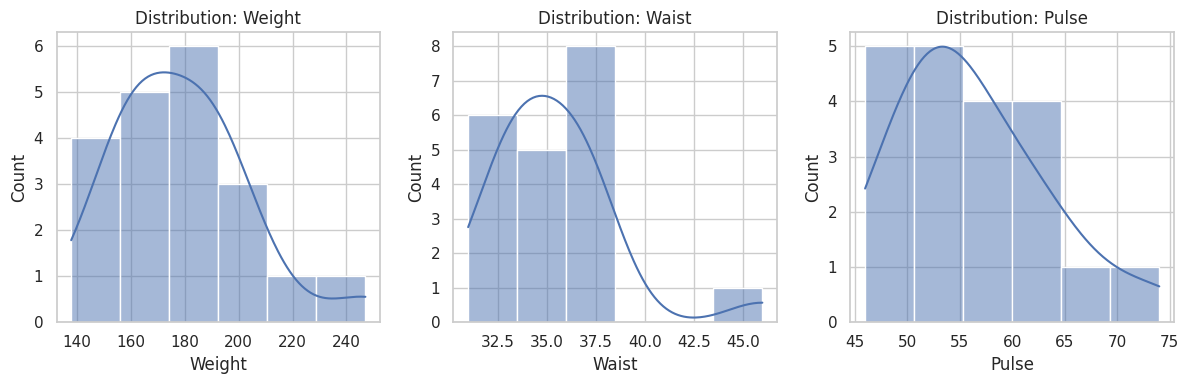

In [6]:
# Target distributions & pairplot
plt.figure(figsize=(12,4))
for i, col in enumerate(y.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(y[col], kde=True)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()

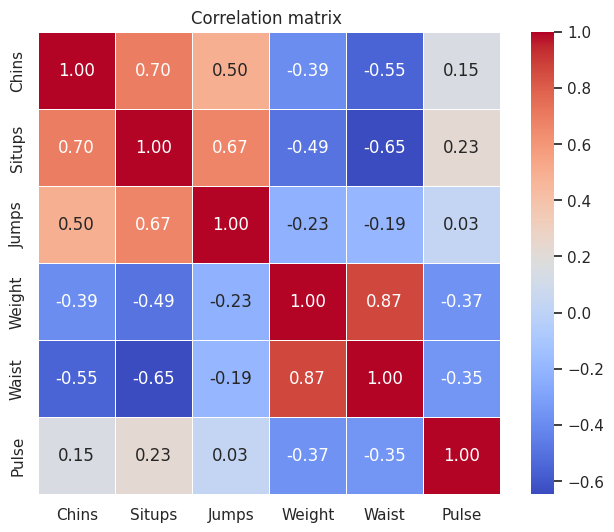

In [9]:
#  Correlation heatmap (features & targets)
plt.figure(figsize=(8,6))
corr = df_combined.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation matrix ")
plt.show()

In [10]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (16, 3) X_test: (4, 3)
y_train: (16, 3) y_test: (4, 3)


In [11]:
#  Scale features (important for numeric stability)
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Keep as DataFrame for easier display later
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


In [12]:
# Train Multivariate Linear Regression (multiple targets)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Trained LinearRegression model.")

Trained LinearRegression model.


In [13]:
# Predict and convert to data frame
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, columns=y.columns, index=y_test.index)

print("Predictions (first 5):")
display(y_pred_df.head())

Predictions (first 5):


,Weight,Waist,Pulse
0,166.299446,34.349313,61.692687
17,149.165443,31.140784,64.132980
15,159.626702,33.151725,59.782455
1,181.509420,37.106506,58.293805


In [14]:
# Evaluation: MAE, RMSE, R² (per target and averages)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
metrics = []
for col in y.columns:
    mae = mean_absolute_error(y_test[col], y_pred_df[col])
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred_df[col]))
    r2 = r2_score(y_test[col], y_pred_df[col])
    metrics.append({'target': col, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

metrics_df = pd.DataFrame(metrics).set_index('target')
display(metrics_df)

# Average metrics across targets
avg_mae = metrics_df['MAE'].mean()
avg_rmse = metrics_df['RMSE'].mean()
avg_r2 = metrics_df['R2'].mean()

print(f"\nAverage MAE:  {avg_mae:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average R²:   {avg_r2:.4f}")

,MAE,RMSE,R2
target,,,
Weight,20.599747,25.115249,-1.243257
Waist,1.616171,2.137965,-0.075505
Pulse,8.084254,9.061700,-2.732473



Average MAE:  10.1001
Average RMSE: 12.1050
Average R²:   -1.3504


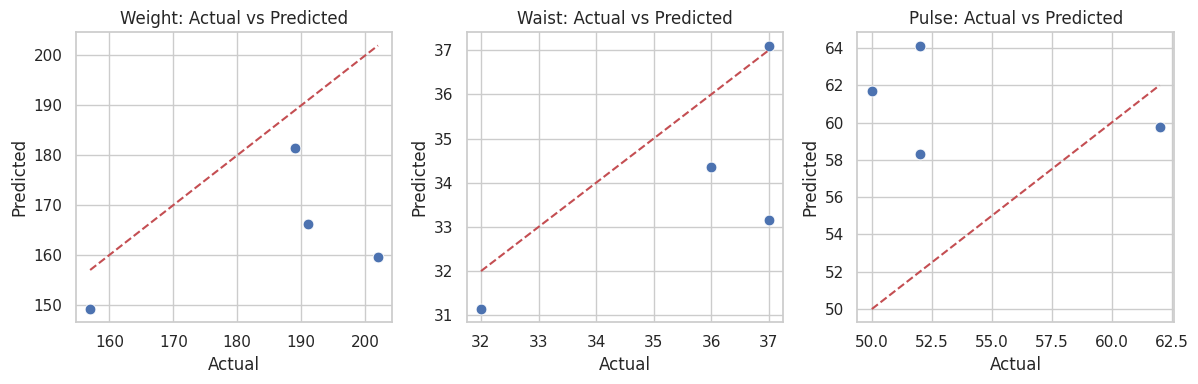

In [15]:
plt.figure(figsize=(12,4))
for i, col in enumerate(y.columns, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test[col], y=y_pred_df[col], s=60)
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{col}: Actual vs Predicted")
plt.tight_layout()
plt.show()

Coefficients (rows=targets, cols=features):


,Chins,Situps,Jumps
Weight,2.369417,-19.584571,4.938486
Waist,-0.411493,-2.983126,1.517528
Pulse,-2.540088,5.732154,-2.717153


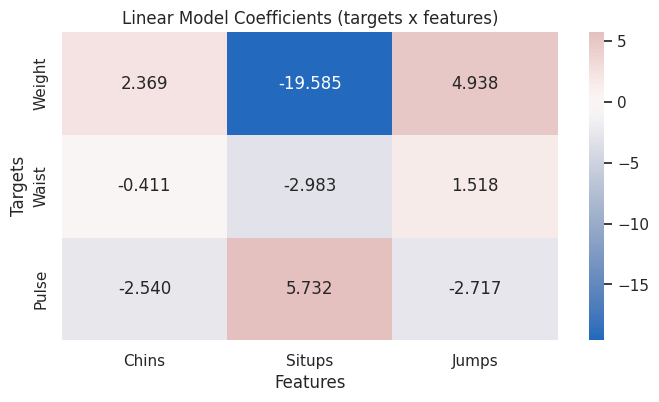

In [16]:
# Coefficients for each target
coef_df = pd.DataFrame(model.coef_, index=y.columns, columns=X.columns)
print("Coefficients (rows=targets, cols=features):")
display(coef_df)

# Heatmap of coefficients
plt.figure(figsize=(8,4))
sns.heatmap(coef_df, annot=True, fmt=".3f", cmap='vlag', center=0)
plt.title("Linear Model Coefficients (targets x features)")
plt.xlabel("Features")
plt.ylabel("Targets")
plt.show()


In [17]:
# Cross-validation scores (R²) — gives a stability estimate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Using 5-fold CV (dataset is small; folds will be small but acceptable)
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2', n_jobs=-1)
print("Cross-validation R² scores:", np.round(cv_scores, 4))
print("Mean CV R²:", np.round(cv_scores.mean(), 4))


Cross-validation R² scores: [ -1.1593  -0.2684 -19.1108  -0.0896  -3.0277]
Mean CV R²: -4.7312


In [18]:
#  Save the trained components for later use
artifact = {
    'model': model,
    'x_scaler': x_scaler,
    'feature_names': X.columns.tolist(),
    'target_names': y.columns.tolist()
}
joblib.dump(artifact, '/content/multivariate_linear_regression_artifact.joblib')
print("Saved artifact to /content/multivariate_linear_regression_artifact.joblib")


Saved artifact to /content/multivariate_linear_regression_artifact.joblib


In this project, we implemented a Multivariate Linear Regression model using the Linnerud dataset from scikit-learn. While the implementation was successful, the model’s performance was poor — reflected by negative R² scores and high error values. This result indicates that the Linear Regression model is not suitable for this dataset.

The main reason for this poor performance is that the Linnerud dataset is very small (only 20 samples) and contains weak, non-linear relationships between input features (physical measurements) and target outputs (exercise data). Linear Regression assumes a strong linear correlation between predictors and targets; when that assumption doesn’t hold, the model fails to capture the true patterns. Furthermore, with such a small sample size, the model becomes unstable during training and cross-validation, resulting in unreliable and highly variable predictions.

Therefore, this model should be avoided for datasets that are small, noisy, or exhibit complex nonlinear relationships. Linear regression works best when:

1.   There are many observations (typically >100),
1.   The relationship between features and target is approximately linear,
2.   The dataset has low multicollinearity
2.   The data is clean and well-scaled.

